# Paper Figures

In [62]:
from iwander import *
%matplotlib nbagg

## Global definitions

In [63]:
BASE_DIR="../"
BD=BASE_DIR+"scratch/"
FIG_DIR="figures/"
WANDERER="Oumuamua"
from matplotlib.backends.backend_pdf import PdfPages

## Load Databases

In [64]:
astrorv=pd.read_csv(BASE_DIR+"db/src/AstroRV.csv")

/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load results

In [65]:
wobjs=pd.read_csv(BD+"wanderer-%s.csv"%WANDERER)
nominal=wobjs.iloc[0]
exec(open(BD+"ingress-%s.dat"%WANDERER).read())

## Figures

### Figure radiant

<IPython.core.display.Javascript object>


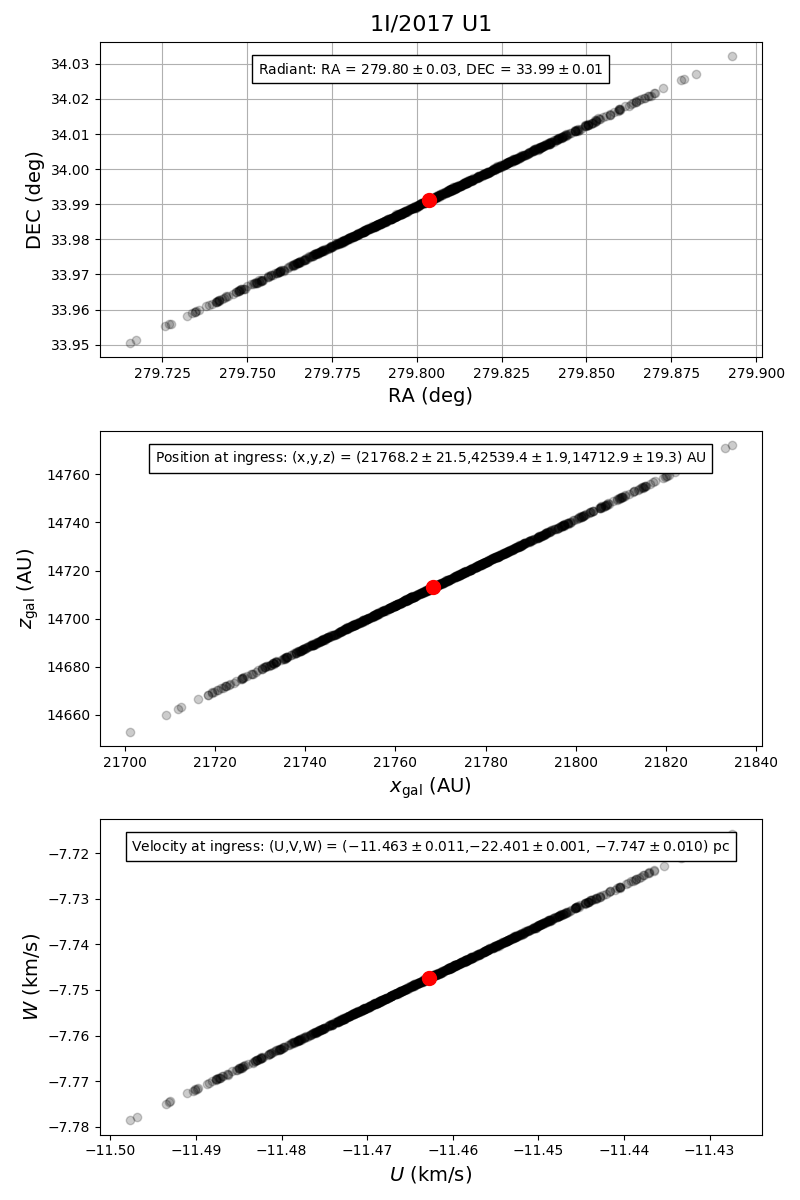

DEC =  33.9908749324 0.0131720987611
RA =  279.8030304 0.0286541901224
b =  17.113656944 0.0172479338254
l =  62.8999074443 0.0219594755915


In [113]:
#fig,axs=subPlots([1,1,1],dh=0.05,figsize=(8,4))
fig,axs=plt.subplots(3,1,figsize=(8,4*3))

dec_error=wobjs.DEC.std()
ra_error=wobjs.RA.std()
dec_mean=wobjs.DEC.mean()
ra_mean=wobjs.RA.mean()

b_error=wobjs.b.std()
l_error=wobjs.l.std()
b_mean=wobjs.b.mean()
l_mean=wobjs.l.mean()

print("DEC = ",dec_mean,dec_error)
print("RA = ",ra_mean,ra_error)

print("b = ",b_mean,b_error)
print("l = ",l_mean,l_error)

ax=axs[0]
ax.plot(wobjs.RA,wobjs.DEC,'ko',alpha=0.2)
ax.plot(wobjs.RA[0],wobjs.DEC[0],'ro',ms=10)

ax.set_xlabel("RA (deg)",fontsize=14)
ax.set_ylabel("DEC (deg)",fontsize=14)

ax.text(0.5,0.90,r"Radiant: RA = $%.2f\pm%.2f$, DEC = $%.2f\pm%.2f$"%(wobjs.RA[0],ra_error,
                                                                       wobjs.DEC[0],dec_error),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax.set_title('1I/2017 U1',position=(0.5,1.01),fontsize=16)
ax.grid()

ax=axs[1]
xecl=wobjs.xgal/AU;yecl=wobjs.ygal/AU;zecl=wobjs.zgal/AU;
dx=xecl.std();dy=yecl.std();dz=zecl.std();

ax.plot(xecl,zecl,'ko',alpha=0.2)
ax.plot(xecl[0],zecl[0],'ro',ms=10)
ax.set_xlabel(r'$x_{\rm gal}$ (AU)',fontsize=14)
ax.set_ylabel(r'$z_{\rm gal}$ (AU)',fontsize=14)

ax.text(0.5,0.90,r"Position at ingress: (x,y,z) = ($%.1f\pm%.1f$,$%.1f\pm%.1f$,$%.1f\pm%.1f$) AU"%(xecl[0],dx,yecl[0],dy,zecl[0],dz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

ax=axs[2]
vx=wobjs.vxgal;vy=wobjs.vygal;vz=wobjs.vzgal;
dvx=vx.std();dvy=vy.std();dvz=vz.std();


ax.plot(vx,vz,'ko',alpha=0.2)
ax.plot(vx[0],vz[0],'ro',ms=10)
ax.set_xlabel(r'$U$ (km/s)',fontsize=14)
ax.set_ylabel(r'$W$ (km/s)',fontsize=14)

ax.text(0.5,0.90,r"Velocity at ingress: (U,V,W) = ($%.3f\pm%.3f$,$%.3f\pm%.3f$, $%.3f\pm%.3f$) pc"%(vx[0],dvx,vy[0],dvy,vz[0],dvz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=10,ha='center')

fig.tight_layout()
fig.savefig(FIG_DIR+"wanderer-radiant-position.pdf")


In [6]:
# Calculate distances of the surrogate objects to the center of the cloud
center=np.array([wobjs.xgal.mean(),wobjs.ygal.mean(),wobjs.zgal.mean()])
ds=np.array([np.linalg.norm([wobjs.loc[ind].xgal-center[0],wobjs.loc[ind].ygal-center[1],wobjs.loc[ind].zgal-center[2]]) for ind in wobjs.index])

# Calculate relative velocities of surrogate objects to the center of the cloud
vcenter=np.array([wobjs.vxgal.mean(),wobjs.vygal.mean(),wobjs.vzgal.mean()])
vs=np.array([np.linalg.norm([wobjs.loc[ind].vxgal-vcenter[0],wobjs.loc[ind].vygal-vcenter[1],wobjs.loc[ind].vzgal-vcenter[2]]) for ind in wobjs.index])

In [10]:
# Calculate cloud expansion velocity
r90=np.percentile(ds,[90])[0]
v90=np.percentile(vs,[90])[0]

#Size properties
print("Cloud radius (r90) = ",r90/AU)
print("Cloud diameter (2*r90) = ",2*r90/AU)
print("Velocity radius (v90) = ",v90)
print("Expansion velocity (2*v90) = ",2*v90)

expansion_vel=2*v90
print("Expansion velocity = ",expansion_vel,2*r90/(t_ing*YEAR))
tret=2*PARSEC/expansion_vel/YEAR/1e6
print("Maximum retrospection time (Myrs) = ",tret)

#Velocity properties


Cloud radius (r90) =  48.9694661063
Cloud diameter (2*r90) =  97.9389322126
Velocity radius (v90) =  0.0257920067683
Expansion velocity (2*v90) =  0.0515840135366
Expansion velocity =  0.0515840135366 0.05162144835
Maximum retrospection time (Myrs) =  37.9112082228


## Thesholds

In [58]:
data=np.loadtxt(BD+"thresholds-Oumuamua.csv")

<IPython.core.display.Javascript object>


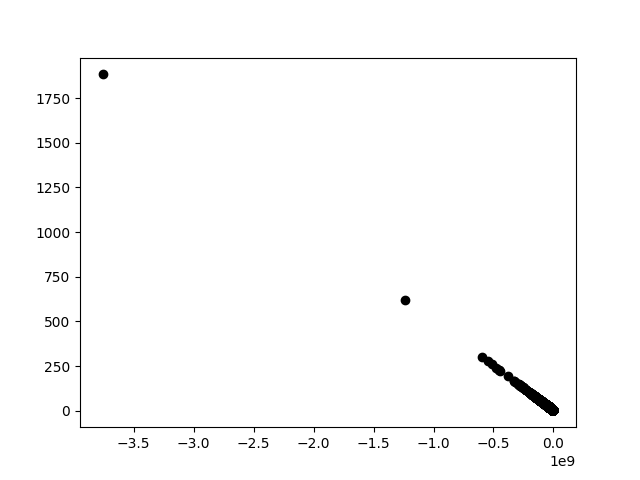

In [63]:
fig,axs=plt.subplots(1,1)
axs.plot(data[:,0],data[:,2],'ko')

## Stitching progenitors files

In [4]:
candidates=pd.read_csv(BD+"candidates-Oumuamua.csv")
len(candidates)

86398

In [5]:
datap=[]
for p in sorted(glob.glob(BD+"all/run*/progenitors-Oumuamua.csv.*")):
    data=pd.read_csv(p)
    datap+=[data]

In [6]:
enes=[]
for p in datap:
    p.dropna(subset=["source_id"], how="any", inplace=True)
    enes+=p[p.Pvelmed>0].source_id.values.tolist()

In [7]:
enes=np.unique(enes)
len(enes)

68421

In [8]:
#Save lacking candidates
lacking=candidates[~candidates.source_id.isin(enes)]
lacking.to_csv(BD+"candidates-Oumuamua.csv.lacking",index=False)
len(lacking)

18374

In [15]:
astrorv[astrorv.hip==31067].parallax_error

296183   NaN
Name: parallax_error, dtype: float64

## Check candidates criteria

In [55]:
cand=pd.read_csv(BD+"candidates-%s.csv.all"%WANDERER)
prog=pd.read_csv(BD+"progenitors-%s.csv.all"%WANDERER)
progsel=pd.read_csv(BD+"progenitors-%s.csv"%WANDERER)

/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/iwander/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
pnonz=prog[(prog.dmin>0)&(prog.nomdmin>0)&(prog.nomtmin<=0)]
print("Total progenitors computed:",len(prog))
print("Total with non-zero distances and negative times:",len(pnonz))
dmin_max=pnonz.dmin.max()
dmin_min=pnonz.dmin.min()
print("Minimum distance:",dmin_min)
print("Maximum distance:",dmin_max)

#Actual candidates
pcand=pnonz[pnonz.nomdmin<10]
print("Total candidates:",len(pcand))

Total progenitors computed: 84520
Total with non-zero distances and negative times: 83980
Minimum distance: 0.143343025372
Maximum distance: 8355.61211766
Total candidates: 1592


<IPython.core.display.Javascript object>


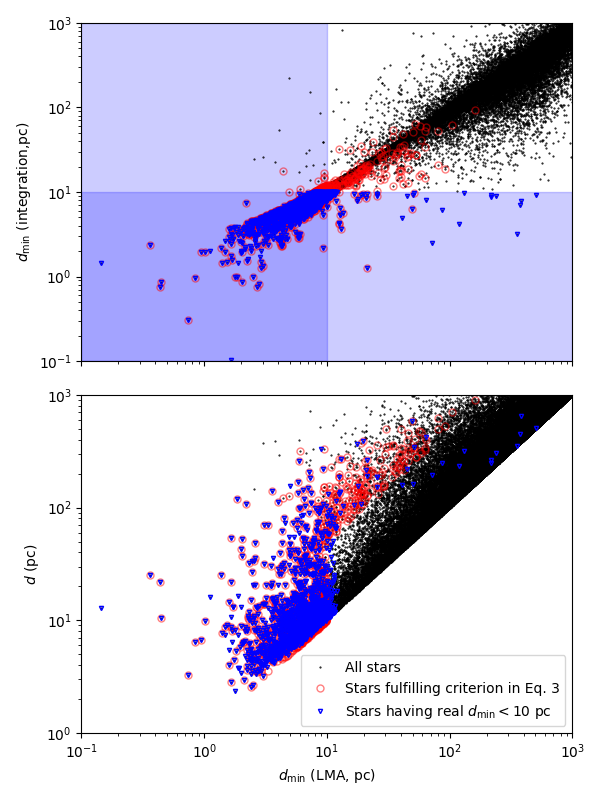

In [124]:
fig,axs=plt.subplots(2,1,sharex=True,sharey=False,figsize=(6,8))

x="dmin"
y="d"

#Plot dmin vs. nomdmin
ax=axs[0]
ax.plot(pnonz.dmin,pnonz.nomdmin,'ko',ms=0.5)
ax.plot(progsel.dmin,progsel.nomdmin,'ro',ms=5,mfc='None',alpha=0.5)
ax.plot(pcand.dmin,pcand.nomdmin,'bv',ms=3,mfc='None')

#Selection area
dmax=10
ax.axhspan(1e-1,dmax,color='b',alpha=0.2)
ax.axvspan(1e-1,dmax,color='b',alpha=0.2)

#Decoration
ax.set_ylabel(r"$d_{\rm min}$ (integration,pc)")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim((1e-1,1e3))

#Plot
ax=axs[1]
ax.plot(np.abs(pnonz[x]),np.abs(pnonz[y]),'ko',ms=0.5,label=r'All stars',rasterized=True)
ax.plot(np.abs(progsel[x]),np.abs(progsel[y]),'ro',ms=5,mfc='None',alpha=0.5,label=r'Stars fulfilling criterion in Eq. 3',rasterized=True)
ax.plot(np.abs(pcand[x]),np.abs(pcand[y]),'bv',ms=3,mfc='None',alpha=1,label=r'Stars having real $d_{\rm min}<10$ pc',rasterized=True)

#axs.axvspan(1e-1,10,alpha=0.2)
ax.legend(loc="lower right")

#Decoration
ax.set_xlabel(r"$d_{\rm min}$ (LMA, pc)")
ax.set_ylabel(r"$d$ (pc)")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim((1e-1,1e3))
ax.set_ylim((1e0,1e3))

fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout()
fig.savefig(FIG_DIR+"candidates-criterion-%s.pdf"%WANDERER)

<IPython.core.display.Javascript object>


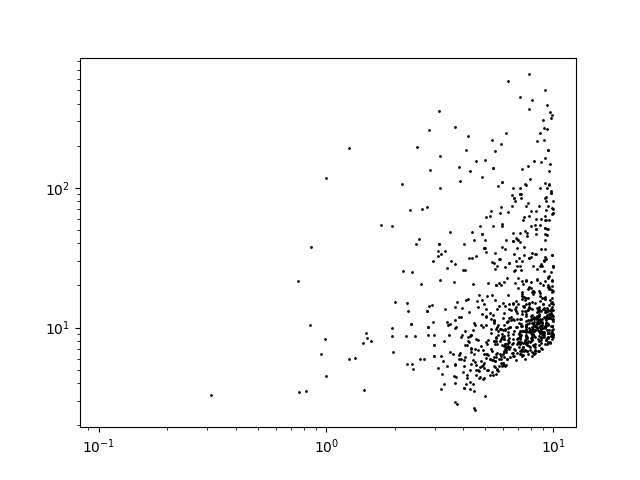

In [115]:
fig,axs=plt.subplots(1,1)



#Plot
axs.plot(pcand.nomdmin,pcand.d,'ko',ms=1)

dmax=dmin_max
axs.set_xscale("log")
axs.set_yscale("log")
#axs.set_xlim((0.5*dmin_min,dmin_max))
#axs.set_ylim((0.5*dmin_min,dmin_max))

## Generate scatter plot of the surrogate objects and nominal star

In [70]:
#Units
UV=9.777922e+08

In [109]:
Ntest=128
pos=np.loadtxt(BD+"particles-Oumuamua-HIP103749.dat")
pos=pos[0]
Nsur=int(len(pos)/6)-Ntest
print("Number of test particles:",Ntest)
print("Number of surrogate stars:",Nsur)

Number of test particles: 128
Number of surrogate stars: 100


In [110]:
#Read test particles and convert to cartesian
rtest=[]
vc=[0,0,0]
for i in range(Ntest):
    rt=pos[6*i:6*i+6]
    vt=rt[3:]
    vc[0]=vt[0]*np.cos(rt[1])-rt[0]*vt[1]*np.sin(rt[1])
    vc[1]=vt[0]*np.sin(rt[1])+rt[0]*vt[1]*np.cos(rt[1])
    vc[2]=vt[2]
    rtest+=[[rt[0]*np.cos(rt[1]),rt[0]*np.sin(rt[1]),rt[2],vc[0],vc[1],vc[2]]]
rtest=np.array(rtest)
rcenter=rtest.mean(axis=0)
rtest=rtest-rcenter
print("Center of the cloud:",rcenter)

#Other properties of the cloud
rs=np.linalg.norm(rtest[:,:3],axis=1)
vs=np.linalg.norm(rtest[:,3:],axis=1)
rq=np.percentile(rs,[10.0,50.0,90.0])
print("Percentiles r:",rq)
vq=np.percentile(vs,[10.0,50.0,90.0])
print("Percentiles v:",vq*UV/1e3)

Center of the cloud: [ -8.14064652e+03  -9.02545283e+02   1.80317584e+01  -2.76992694e-05
   2.13095143e-04   5.83838263e-08]
Percentiles r: [ 0.00782763  0.04202647  0.10156683]
Percentiles v: [  3.67670478e-08   2.07341460e-07   4.98348795e-07]


In [111]:
#Read test particles and convert to cartesian
rsur=[]
vc=[0,0,0]

Nsur_acc=0
for i in range(Ntest,Ntest+Nsur):
    rt=pos[6*i:6*i+6]
    if rt[0]==99.99:continue
    vt=rt[3:]
    vc[0]=vt[0]*np.cos(rt[1])-rt[0]*vt[1]*np.sin(rt[1])
    vc[1]=vt[0]*np.sin(rt[1])+rt[0]*vt[1]*np.cos(rt[1])
    vc[2]=vt[2]
    rsur+=[[rt[0]*np.cos(rt[1]),rt[0]*np.sin(rt[1]),rt[2],vc[0],vc[1],vc[2]]]
    Nsur_acc+=1
Nsur=Nsur_acc
rsur=np.array(rsur)
print("Number of surrogates:",Nsur)
rcenter=rsur.mean(axis=0)
rsur=rsur-rcenter
print("Center of the cloud:",rcenter)

#Other properties of the cloud
rs=np.linalg.norm(rsur[:,:3],axis=1)
vs=np.linalg.norm(rsur[:,3:],axis=1)
rq=np.percentile(rs,[10.0,50.0,90.0])
print("Percentiles r:",rq)
vq=np.percentile(vs,[10.0,50.0,90.0])
print("Percentiles v:",vq*UV/1e3)

Number of surrogates: 99
Center of the cloud: [ -8.13938364e+03  -9.02854446e+02   1.96861881e+01  -2.64895920e-05
   2.25292152e-04  -1.19494817e-06]
Percentiles r: [ 1.16100727  2.61262486  4.31261885]
Percentiles v: [  5.67774109e-06   1.28552634e-05   2.14563783e-05]


In [ ]:
#Calculate density
#COMPUTE SPH DENSITY
xmin,xmax=rsur[:,0].min(),rsur[:,0].max()
ymin,ymax=rsur[:,1].min(),rsur[:,1].max()
zmin,zmax=rsur[:,2].min(),rsur[:,2].max()

xs=np.linspace(xmin,xmax,20);
zs=np.linspace(ymin,ymax,20);
ys=np.linspace(zmin,zmax,20);

dx=xs[1]-xs[0]
dy=ys[1]-ys[0]
dz=zs[1]-zs[0]

X,Y=np.meshgrid(xs,ys)
P=np.zeros_like(X)

h=0.5
sigma=wNormalization2(h)

dcell=1
for i,x in enumerate(xs):
    for j,y in enumerate(ys):
        p=0.0
        for k,z in enumerate(zs):
            rq=np.array([x,z,y])
            for n in range(Nsur):
                d=np.linalg.norm(rq-rsur[n,:3])
                pv=sigma*wFunction2(d,h)*dcell**2*dz
                p+=pv
        p/=Nsur
        P[j,i]=p

<IPython.core.display.Javascript object>


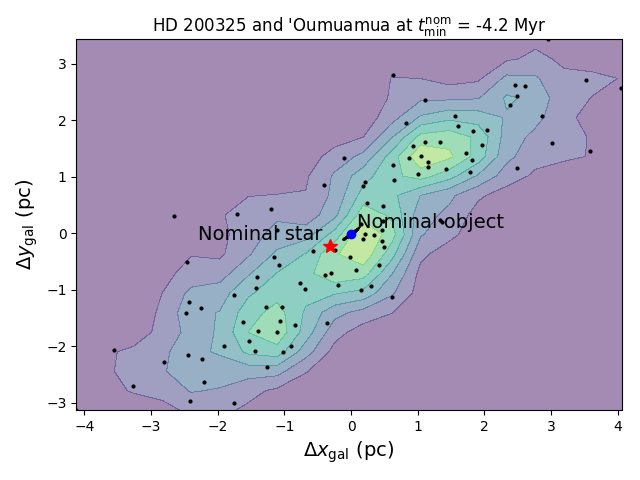

In [115]:
fig,axs=plt.subplots(1,1)

#Plot
axs.plot(rsur[1:,0],rsur[1:,2],'ko',ms=2)
axs.plot(rsur[0,0],rsur[0,2],'r*',ms=10)
axs.plot(rtest[1:,0],rtest[1:,2],'ko',ms=1)
axs.plot(rtest[0,0],rtest[0,2],'bo')

#Contour
axs.contourf(X,Y,P,alpha=0.5)

#Decoration
axs.set_xlabel(r"$\Delta x_{\rm gal}$ (pc)",fontsize=14)
axs.set_ylabel(r"$\Delta y_{\rm gal}$ (pc)",fontsize=14)
axs.set_title(r"HD 200325 and 'Oumuamua at $t_{\rm min}^{\rm nom}$ = -4.2 Myr")

axs.text(rtest[0,0]+0.1,rtest[0,2]+0.1,"Nominal object",fontsize=14)
axs.text(rsur[0,0]-0.1,rsur[0,2]+0.1,"Nominal star",ha='right',fontsize=14)

fig.tight_layout()
fig.savefig(FIG_DIR+"encounter-probability.pdf")

## Comparison of minimum distances

<IPython.core.display.Javascript object>


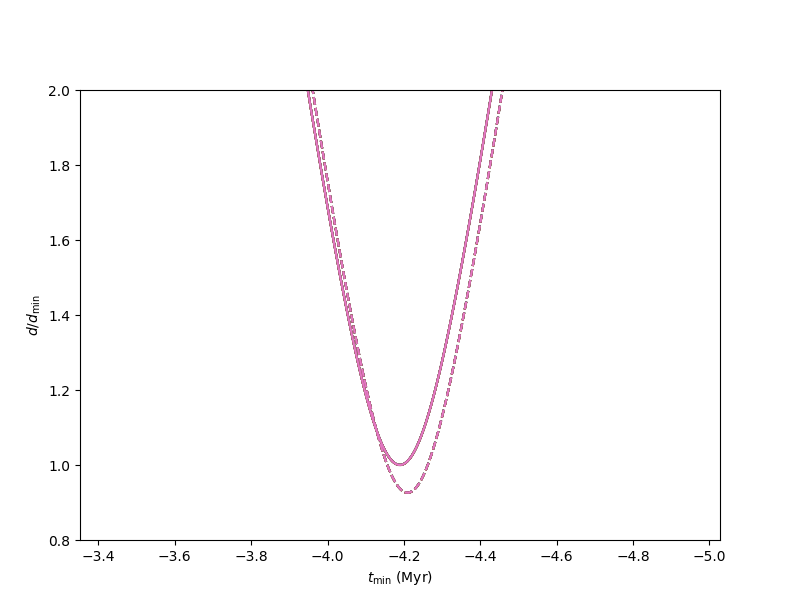

Minimum: -4189982.0 1.715093
Minimum: -4189982.0 1.715093
Minimum: -4189982.0 1.715093
Minimum: -4190859.0 1.715163
Minimum: -4186913.0 1.715384
Minimum: -4192175.0 1.715395
Minimum: -4186036.0 1.71562
Minimum: -4193490.0 1.715781
Minimum: -4186913.0 1.715384
Minimum: -4191298.0 1.715223
Minimum: -4191298.0 1.715223
Minimum: -4193271.0 1.715706
Minimum: -4187570.0 1.715251
Minimum: -4186913.0 1.715384
Minimum: -4189982.0 1.715093
Minimum: -4193271.0 1.715706
Minimum: -4186913.0 1.715384


Text(0,0.5,'$d/d_{\\rm min}$')

In [294]:
fig,axs=subPlots([1])
ax=axs[0][0]
lista=glob.glob(BD+"surrogatetraj-*.dat")
tmins=[]
for file in lista[::3]:
    traj=np.loadtxt(file)
    ts=traj[:,0]
    Ds=traj[:,1]
    Dlmas=traj[:,-1]
    iargs=Ds.argsort()
    dmin=Ds[iargs][0]
    tmin=ts[iargs][0]
    print("Minimum:",tmin,dmin)
    tmins+=[tmin]
    line,=ax.plot(ts/1e6,Ds/dmin,'-',ms=2)
    ax.plot(ts/1e6,Dlmas/dmin,'-',ms=2,color=line.get_color(),ls='--')

tmins=np.array(tmins)
ax.set_xlim((tmins.mean()*0.8/1e6,1.2*tmins.mean()/1e6))
ax.set_ylim((0.8,2))
ax.set_xlabel(r"$t_{\rm min}$ (Myr)")
ax.set_ylabel(r"$d/d_{\rm min}$")

## Distribution of ejection velocities

In [117]:
data=np.loadtxt(BASE_DIR+"util/legacy/dev/ejection-results.data")
aps=np.unique(data[:,0]);na=len(aps)
Mps=np.unique(data[:,1]);nM=len(Mps)
vmean_data=data[:,2].reshape(na,nM)
vstd_data=data[:,3].reshape(na,nM)
print("Number of data points: N(a) = %d, N(Mp) = %d"%(na,nM))
print("Values of ap:",aps)
print("Values of Mp:",Mps)

Number of data points: N(a) = 24, N(Mp) = 21
Values of ap: [ 0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5  2.7  2.9  3.1  3.3
  3.5  3.7  3.9  4.1  4.3  4.5  4.7  4.9  5.1]
Values of Mp: [ 0.0001      0.0001216   0.00014788  0.00017982  0.00021867  0.00026591
  0.00032336  0.00039322  0.00047818  0.00058148  0.00070711  0.00085987
  0.00104564  0.00127154  0.00154625  0.0018803   0.00228653  0.00278051
  0.00338122  0.0041117   0.005     ]


In [118]:
#Load results
vs=[]
hs=[]
xs=[]
Mpps=[]
apps=[]
for file in glob.glob(BASE_DIR+"util/legacy/dev/data/*ap_5.0e+00*.data"):
    parts=file.split("--")
    Mp=float(parts[1].replace("Mp_",""))
    ap=float(parts[2].replace("ap_",""))
    vinfs=np.loadtxt(file)
    h,x=np.histogram(vinfs,30,normed=True)
    vmean=vinfs.mean()
    vstd=vinfs.std()
    vs+=[vinfs]
    hs+=[h]
    xs+=[x]
    Mpps+=[Mp]
    apps+=[ap]
    print("Velocity distribution for Mp = %e, ap = %e: vmean = %e, sigmav = %e"%(Mp,ap,vmean,vstd))
    
iargs=np.argsort(Mpps)
Mpps=np.array(Mpps)[iargs]
apps=np.array(apps)[iargs]
xs=np.array(xs)[iargs]
hs=np.array(hs)[iargs]
vs=np.array(vs)[iargs]

Velocity distribution for Mp = 1.000000e-02, ap = 5.000000e+00: vmean = 4.004175e-01, sigmav = 1.459988e-01
Velocity distribution for Mp = 1.000000e-03, ap = 5.000000e+00: vmean = 1.879614e-01, sigmav = 1.120181e-01
Velocity distribution for Mp = 5.000000e-03, ap = 5.000000e+00: vmean = 2.999224e-01, sigmav = 1.254320e-01


<IPython.core.display.Javascript object>


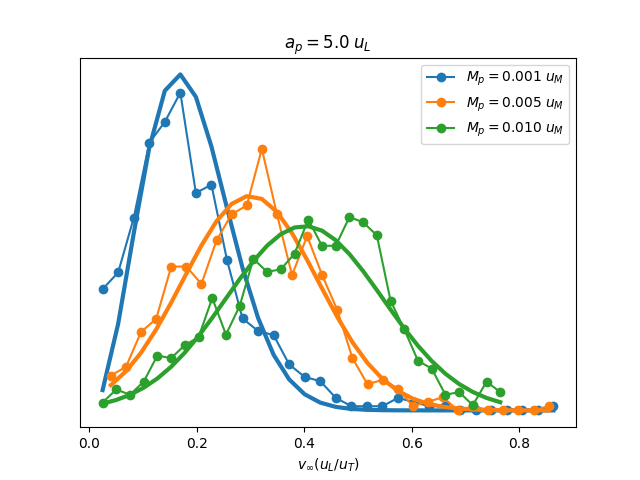

In [120]:
fig=plt.figure()
ax=fig.gca()

for i in range(len(vs)):
    Mp=Mpps[i]
    ap=apps[i]
    vinfs=vs[i]
    x=xs[i]
    h=hs[i]
    vmean=vinfs.mean()
    vstd=vinfs.std()
    xm=(x[1:]+x[:-1])/2
    line,=ax.plot(xm,h,'o-',label='$M_p=%.3f\;u_M$'%Mp)
    if Mp<5e-3:
        pt=h.sum()*(xm[1]-xm[0])*maxwellDistrib(xm,vmean)
    else:
        pt=h.sum()*(xm[1]-xm[0])*gaussian.pdf(xm,vmean,vstd)
    ax.plot(xm,pt,'-',lw=3,color=line.get_color())

ax.set_xlabel("$v_\infty$($u_L/u_T$)")
ax.set_yticks([])
ax.legend(loc='best')
ax.set_title("$a_p=%.1f\;u_L$"%apps[0])

fig.savefig(FIG_DIR+"ejection-velocity-distributions.pdf")

In [88]:
MSUN=2e30
GCONST=6.67e-11
UL=1*AU*1e3
UM=0.5*MSUN
UT=np.sqrt(UL**3/(GCONST*UM))
UV=UL/UT
MPS,APS=np.meshgrid(Mps,aps)

<IPython.core.display.Javascript object>


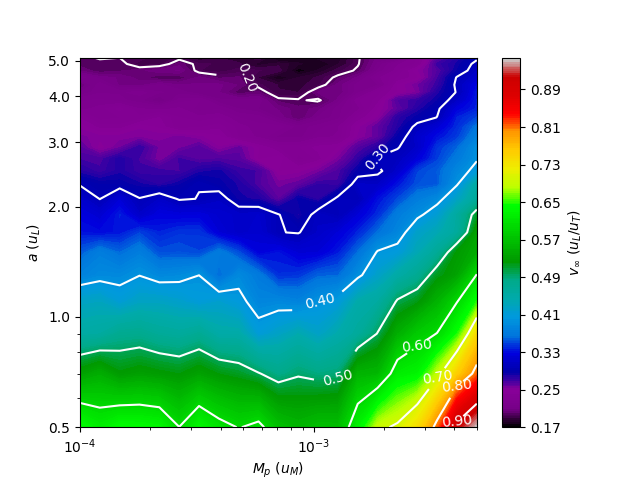

/home/iwander/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [121]:
fig=plt.figure()
ax=fig.gca()

c=ax.contourf(MPS,APS,vmean_data,200,cmap='spectral')
cb=fig.colorbar(c)
cb.set_label("$v_\infty$ ($u_L/u_T$)")
xl=[]
for x in cb.get_ticks():xl+=["%.2f"%x]
cb.set_ticklabels(xl)

c=ax.contour(MPS,APS,vmean_data,colors='w')
ax.clabel(c,inline=True,fmt="%.2f")

ax.set_xlabel("$M_p$ ($u_M$)")
ax.set_ylabel("$a$ ($u_L$)")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_yticks([0.5,1.0,2.0,3.0,4.0,5.0])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.savefig(FIG_DIR+"ejection-velocity-vmean-contours.pdf")

In [91]:
dvv=[]
for i,M in enumerate(Mps[::1]):
    ratio=vstd_data[:,i]/vmean_data[:,i]
    avg=ratio.mean()
    std=ratio.std()
    dvv+=[avg]

<IPython.core.display.Javascript object>


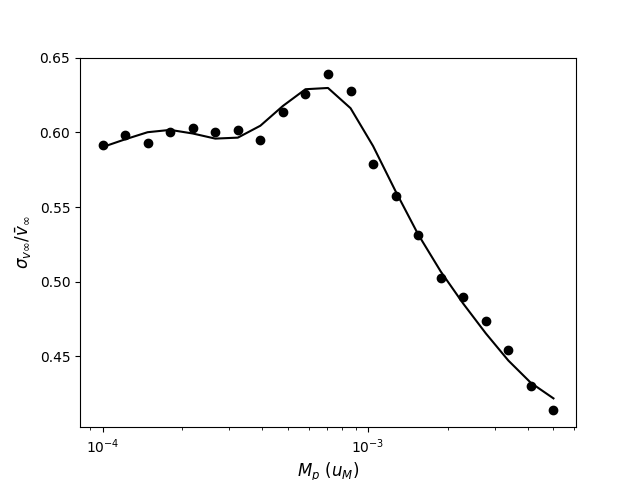

In [122]:
b,a=signal.butter(10,0.325)
sdv=signal.filtfilt(b,a,dvv,padlen=6)
fig=plt.figure()
ax=fig.gca()

ax.plot(Mps,dvv,'ko')
ax.plot(Mps,sdv,'k-')
#ax.plot(Mp,0.5*np.sqrt(1e-3/Mp))

ax.set_xscale('log')
ax.set_ylabel(r"$\sigma_{v\infty}/\bar{v}_\infty$",fontsize=12)
ax.set_xlabel(r"$M_p$ ($u_M$)",fontsize=12)

fig.savefig(FIG_DIR+"ejection-velocity-dispersion.pdf")

In [94]:
verbose=0

#MONTECARLO
#np.random.seed(3)
iMs=np.arange(len(Mps))
ias=np.arange(len(aps))

if verbose:
    print(np.vstack((iMs,Mps,sdv)).transpose())
    print(np.vstack((ias,aps)).transpose())

Npart=10000

vpgs=[]
vpms=[]
vpxs=[]
for i in range(Npart):
    #Generate a mass
    Mp=10**uniform(np.log10(Mps[0]),np.log10(Mps[-1]))
    iM=iMs[(Mp-Mps)>0][-1]

    #Generate a distance
    ap=uniform(aps[0],aps[-1])
    ia=ias[(ap-aps)>0][-1]
    
    #Estimate the velocity dispersion
    dv=sdv[iM]+(sdv[iM+1]-sdv[iM])/(Mps[iM+1]-Mps[iM])*(Mp-Mps[iM])
    
    #Estimate the mean velocity
    #Position in file
    j=ia*nM+iM
    vmean=data[j,3]
    vstd=vmean*dv
    if verbose:print("Mp=%e, ap=%e, vmean=%e, vstd=%e"%(Mp,ap,vmean,vstd))
    
    #Generate random velocity following a gaussian with mean vmean and vstd
    vg=-1
    while vg<0:vg=np.random.normal(vmean,vstd)
    
    #Generate random velocity followin a Maxwellian with mean vmean
    vm=maxwell.rvs(size=1,scale=vmean)[0]
      
    vpgs+=[vg]
    vpms+=[vm]
    
    if Mp>1e-3:v=vm
    else:v=vg
    vpxs+=[v]
        
    if verbose:
        print("Particle velocity:%e"%v)
        break

In [95]:
nbins=50

hims,vims=np.histogram(vpms,nbins,normed=True)
vmms=(vims[1:]+vims[:-1])/2

higs,vigs=np.histogram(vpgs,nbins,normed=True)
vmgs=(vigs[1:]+vigs[:-1])/2

hixs,vixs=np.histogram(vpxs,nbins,normed=True)
vmxs=(vixs[1:]+vixs[:-1])/2

<IPython.core.display.Javascript object>


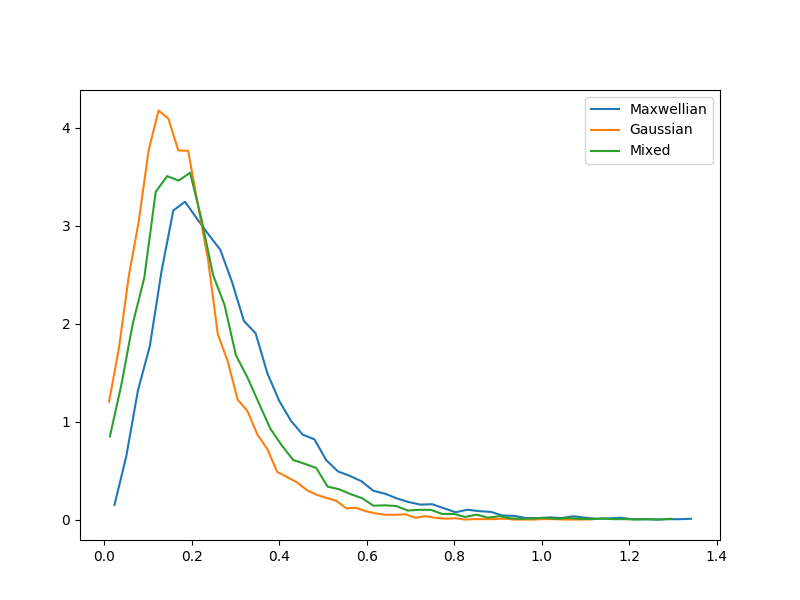

In [96]:
fig,axs=subPlots([1])
ax=axs[0][0]

ax.plot(vmms,hims,label='Maxwellian')
ax.plot(vmgs,higs,label='Gaussian')
ax.plot(vmxs,hixs,label='Mixed')

ax.legend(loc='best')

<IPython.core.display.Javascript object>


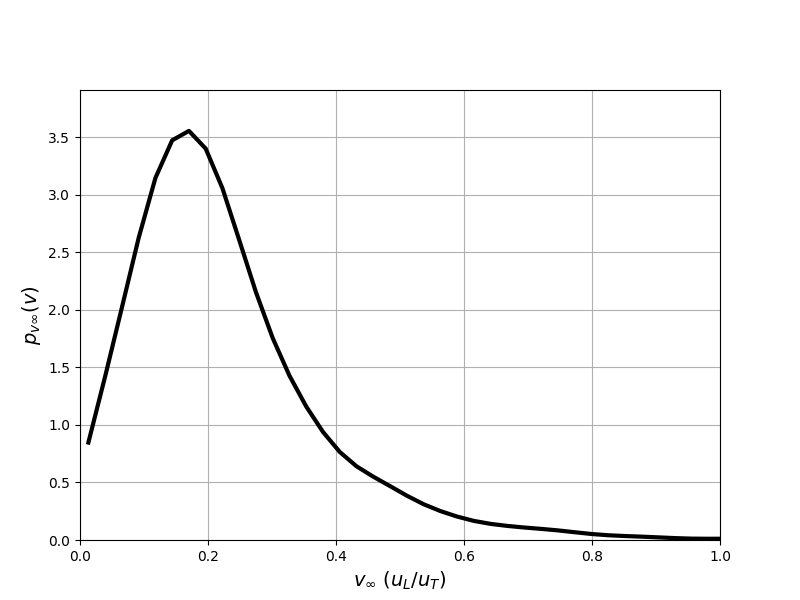

In [123]:
b,a=signal.butter(2,0.325)
shixs=signal.filtfilt(b,a,hixs,padlen=6)
mu=(vmxs*shixs).sum()/shixs.sum()

fig,axs=subPlots([1])
ax=axs[0][0]

#ax.plot(vmxs,hixs,'ko')
ax.plot(vmxs,shixs,color='k',lw=3)

vext=np.linspace(0.2,2.0,100)
hext=12*10**(-3*vext)
#ax.plot(vext,hext)

#ax.plot(vmxs,maxwellDistrib(vmxs,mu))
ax.set_ylim((0,1.1*shixs.max()))
ax.set_xlim((0.,1))
#ax.set_yticks([])

ax.set_xlabel("$v_\infty$ ($u_L/u_T$)",fontsize=14)
ax.set_ylabel("$p_{v\infty}(v)$",fontsize=14)
ax.grid()
#ax.set_yscale("log")
np.savetxt(BD+"ejection-posterior.data",np.vstack(([0.0,0.0],np.vstack((vmxs,hixs)).transpose())))

fig.savefig(FIG_DIR+"ejection-velocity-posterior.pdf")

### Progenitors

In [36]:
prog=pd.read_csv(BD+"progenitors-%s.csv"%WANDERER)
len(prog)

1993

In [37]:
prog[["Ppos","Pvel","Pposvel","Pdist","IOP"]]

,Ppos,Pvel,Pposvel,Pdist,IOP
0,-91.697770,-13.62056,-105.32720,-12.00339,-117.33060
1,-46.023670,-17.29962,-63.36607,-12.06472,-75.43080
2,-211.353300,-15.22953,-226.57890,-12.03953,-238.61840
3,-72.925070,-17.08905,-90.01766,-11.90749,-101.92520
4,-84.667680,-16.12135,-101.35030,-12.85676,-114.20700
5,-74.683840,-17.22607,-91.90911,-12.29859,-104.20770
6,-59.319390,-16.40395,-75.60922,-14.17624,-89.78546
7,-123.475800,-16.83338,-140.30970,-12.07721,-152.38690
8,-83.403860,-15.37432,-98.91874,-13.90884,-112.82760
9,-57.525060,-16.93176,-78.03077,-13.40141,-91.43218


In [38]:
prog[["vrell","vrelmed","vrelu"]]/1e6

,vrell,vrelmed,vrelu
0,3.078075,3.240792,3.378499
1,22.917860,23.447810,23.680100
2,16.442320,16.568580,16.710410
3,29.560900,29.866160,30.308730
4,19.821970,20.074350,20.351490
5,28.771160,28.917570,29.011040
6,21.223540,21.927710,27.103400
7,28.042770,28.217130,28.331480
8,14.086840,15.579220,17.479290
9,25.781640,36.244420,55.215820


In [39]:
prog[["dminl","dminmed","dminu"]]

,dminl,dminmed,dminu
0,7.045394,7.333604,7.595736
1,4.605041,4.698091,4.800192
2,10.809630,10.900410,10.988610
3,6.010603,6.095886,6.171294
4,6.679294,6.850137,7.146516
5,6.123733,6.231384,6.360176
6,13.660170,26.709650,36.316360
7,8.098560,8.129182,8.174473
8,7.160813,9.586795,29.055980
9,5.504350,9.163919,13.292820


In [35]:
prog[["tminl","tminmed","tminu"]]/1e6

,tminl,tminmed,tminu
0,-4.445630,-4.288726,4.445630
1,-0.679644,-0.663068,0.679644
2,-0.725214,-0.725214,0.725214
3,-0.401503,-0.401503,0.401503
4,-2.008786,-1.996152,2.008786
5,-0.689528,-0.689528,0.689528
6,-8.955333,-8.499977,8.955333
7,-0.519314,-0.512741,0.519314
8,-9.576248,-8.773769,9.576248
9,-3.232158,-2.100903,3.232158


In [5]:
prog[prog.nomdmin<10].sort_values(by="Ppos",ascending=False)

,nomtmin,nomdmin,nomvrel,dminl,dminmed,dminu,dminl.1,dminmed.1,dminu.1,tminl,...,Vmag_simbad,Hpmag_hip,e_Hpmag_hip,B_V_hip,e_B_V_hip,V_I_hip,RV,e_RV,source_rv,source_erv
0,-4288726.000,7.297778,3.311903,7.045394,7.333604,7.595736,7.045394,7.333604,7.595736,-4.445630e+06,...,8.574,8.7138,0.0015,1.269,0.014,1.42,10.9700,0.120000,Maldonado2010.tsv,Catalogue
1,-671356.000,4.707879,23.813010,4.605041,4.698091,4.800192,4.605041,4.698091,4.800192,-6.796443e+05,...,9.900,10.0042,0.0032,1.420,0.015,1.76,33.4000,0.400000,Pulkovo.tsv,Catalogue
5,-401503.100,6.115586,30.456960,6.010603,6.095886,6.171294,6.010603,6.095886,6.171294,-4.015031e+05,...,9.580,9.6770,0.0033,1.437,0.016,1.77,35.1000,0.300000,Pulkovo.tsv,Catalogue
6,-1996152.000,6.877251,20.524100,6.679294,6.850137,7.146516,6.679294,6.850137,7.146516,-2.008786e+06,...,7.650,7.7734,0.0018,0.704,0.018,0.76,24.8000,0.200000,GCS2011.tsv,Catalogue
7,-689528.200,6.258900,29.585790,6.123733,6.231384,6.360176,6.123733,6.231384,6.360176,-6.895282e+05,...,7.580,7.6039,0.0011,0.953,0.025,1.00,31.8800,0.080000,Maldonado2010.tsv,Catalogue
9,-512740.600,8.131334,28.862850,8.098560,8.129182,8.174473,8.098560,8.129182,8.174473,-5.193142e+05,...,8.420,8.2329,0.0035,1.104,0.006,1.18,36.0000,0.110000,Maldonado2010.tsv,median
10,-8666772.000,7.731879,16.062720,7.160813,9.586795,29.055980,7.160813,9.586795,29.055980,-9.576248e+06,...,8.360,8.4501,0.0010,0.388,0.003,0.45,26.5000,1.100000,Pulkovo.tsv,Catalogue
11,-2585726.000,9.928766,29.932170,5.504350,9.163919,13.292820,5.504350,9.163919,13.292820,-3.232158e+06,...,6.900,6.9975,0.0012,0.461,0.009,0.53,39.3000,18.600000,GCS2011.tsv,Catalogue
13,-4118566.000,7.399972,14.477210,7.243314,7.463881,8.637133,7.243314,7.463881,8.637133,-4.195789e+06,...,8.310,8.4369,0.0628,0.609,0.015,0.68,21.0000,0.200000,GCS2011.tsv,Catalogue
14,-1727399.000,7.503923,27.192130,7.320130,7.481437,7.661210,7.320130,7.481437,7.661210,-1.748992e+06,...,7.220,7.3210,0.0013,0.496,0.015,0.57,32.4000,0.300000,GCS2011.tsv,Catalogue
